In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000763907"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000763907
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,FIRST UNITED CORP/MD/
Ticker,FUNC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,54.0,1.370389e+01,2.147076e+00,10.21,1.149250e+01,14.37,1.546500e+01,17.27
interest income,54.0,1.560007e+07,4.386955e+06,10880000.00,1.170675e+07,13961500.00,1.890300e+07,25044000.00
net income,54.0,1.629333e+06,2.200642e+06,-5586000.00,1.191250e+06,1964000.00,2.857500e+06,6385000.00
net interest income,54.0,1.023522e+07,1.286836e+06,8660000.00,9.371500e+06,9917500.00,1.086025e+07,13826000.00
provision for loan losses,54.0,1.269722e+06,1.832456e+06,-1107000.00,3.115000e+05,597500.00,1.278500e+06,8124000.00


# Plots

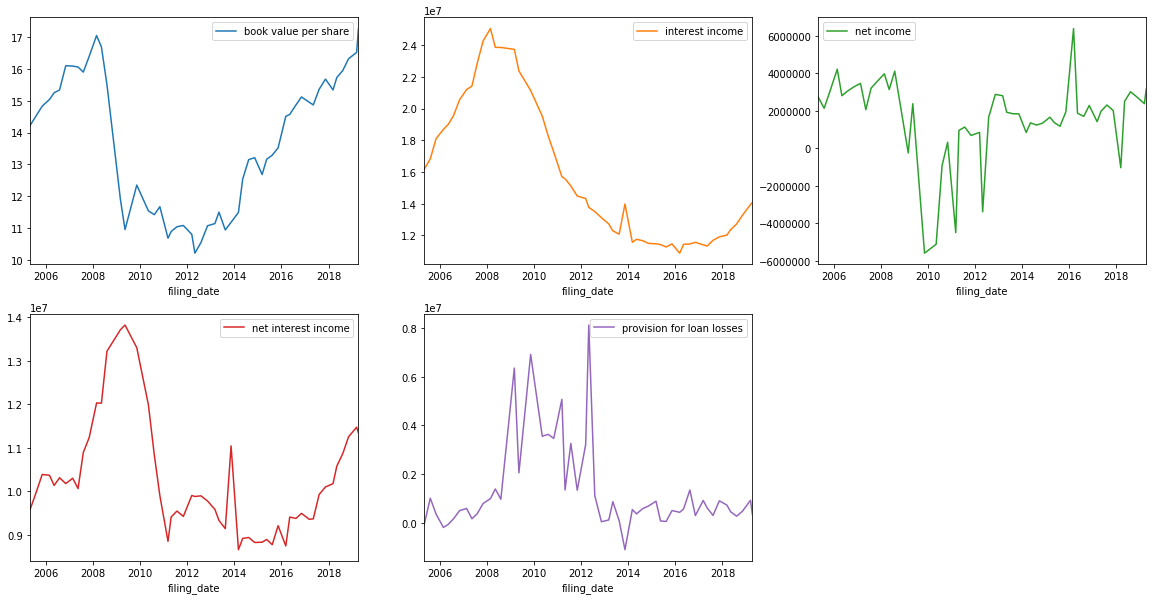

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type             message
cik        item                                                          
0000763907 book value per share       2008Q3  missing      Missing period
           book value per share       2009Q2  missing      Missing period
           book value per share       2009Q4  missing      Missing period
           interest income            2008Q3  missing      Missing period
           interest income            2009Q2  missing      Missing period
           interest income            2009Q4  missing      Missing period
           net income                 2008Q3  missing      Missing period
           net income                 2009Q2  missing      Missing period
           net income                 2009Q4  missing      Missing period
           net interest income        2008Q3  missing      Missing period
           net interest income        2009Q2  missing      Missing period
           net interest income        2009Q4  missing      Missing period
           provision for loan losses  2008Q3  missing      Missing period
           provision for loan losses  2009Q2  missing      Missing period
           provision for loan losses  2009Q4  missing      Missing period
           total revenue                None    empty  No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()